In [54]:
#!pip install statsmodels

In [55]:
import pandas as pd
import statsmodels.api as sm

#### Load india_state_data worksheet

In [56]:
ind_data = pd.read_csv('india_state_data.csv')

In [57]:
ind_data = ind_data.rename(columns={'diff': 'rt_diff', 'testing2ndapr':'test1', 'test 9may': 'test2'})
ind_data['test_diff'] = ind_data['test2'] - ind_data['test1']

In [58]:
ind_data.head()

,States,Rt2ndapril,Rt9may,rt_diff,test1,test2,test diff,log(test diff),hdi,governance,pche,interaction,test_diff
0,AP,2.18,0.98,1.20,21,3121,3100,8.039,0.650,5.05,1013,5.225349,3100
1,BR,1.72,1.10,0.62,25,286,261,5.565,0.576,4.40,491,3.205440,261
2,DL,2.05,1.12,0.93,143,4591,4448,8.400,0.746,5.62,1992,6.266400,4448
3,GJ,1.35,1.06,0.29,66,1716,1650,7.409,0.672,5.04,1189,4.978848,1650
4,HR,1.96,1.15,0.81,48,1945,1897,7.548,0.708,5.00,1119,5.343984,1897


In [59]:
ind_data2 = ind_data[['rt_diff', 'test_diff', 'hdi', 'governance', 'pche']].copy()
ind_data2.columns

Index(['rt_diff', 'test_diff', 'hdi', 'governance', 'pche'], dtype='object')

In [60]:
ind_data2.head()

,rt_diff,test_diff,hdi,governance,pche
0,1.20,3100,0.650,5.05,1013
1,0.62,261,0.576,4.40,491
2,0.93,4448,0.746,5.62,1992
3,0.29,1650,0.672,5.04,1189
4,0.81,1897,0.708,5.00,1119


### MinMax Normalization of all columns

In [61]:
for c in ind_data2.columns.values:
    mmin = ind_data2[c].min()
    mmax = ind_data2[c].max()
    ind_data2[c] = (ind_data2[c] - mmin) / (mmax-mmin)

In [62]:
y = ind_data2.rt_diff.values
X = ind_data2[['test_diff', 'hdi', 'governance', 'pche']]

In [63]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.634
Method:                 Least Squares   F-statistic:                              7.505
Date:                Mon, 11 May 2020   Prob (F-statistic):                     0.00361
Time:                        06:51:52   Log-Likelihood:                        -0.89814
No. Observations:                  15   AIC:                                      9.796
Df Residuals:                      11   BIC:                                      12.63
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Add Interaction Term

In [64]:
ind_data2['xterm'] = ind_data2['test_diff']*ind_data2['hdi']

In [67]:
X = ind_data2[['test_diff', 'hdi', 'governance', 'pche', 'xterm']]

In [68]:
model2 = sm.OLS(y, X)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.640
Method:                 Least Squares   F-statistic:                              6.340
Date:                Mon, 11 May 2020   Prob (F-statistic):                     0.00666
Time:                        06:54:08   Log-Likelihood:                       -0.060217
No. Observations:                  15   AIC:                                      10.12
Df Residuals:                      10   BIC:                                      13.66
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Misc Analysis

In [69]:
sm.stats.linear_rainbow(results)

(1.5688969386714713, 0.3882351817214336)

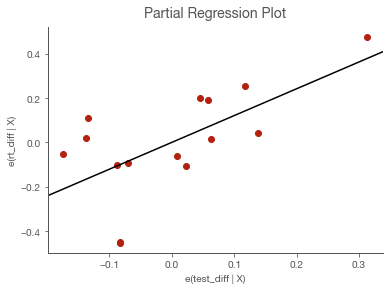

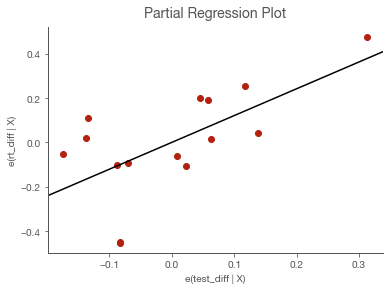

In [70]:
sm.graphics.plot_partregress('rt_diff', 'test_diff', ['hdi', 'governance', 'pche'], data=ind_data2, obs_labels=False)

In [71]:
model = sm.OLS(y, X)
results = model.fit_regularized(L1_wt=0.0)
print(results.params)

[ 1.29155843 -0.22758562  0.58588266 -0.2638172  -1.04244082]
